In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [120]:
Matches=pd.read_csv("matches.csv")

In [121]:
Matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


# How many rows and columns are there?#  

In [122]:
Matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# Match details

In [123]:
Matches.describe

<bound method NDFrame.describe of         id  season           city        date                        team1  \
0        1    2017      Hyderabad  2017-04-05          Sunrisers Hyderabad   
1        2    2017           Pune  2017-04-06               Mumbai Indians   
2        3    2017         Rajkot  2017-04-07                Gujarat Lions   
3        4    2017         Indore  2017-04-08       Rising Pune Supergiant   
4        5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
..     ...     ...            ...         ...                          ...   
751  11347    2019         Mumbai    05/05/19        Kolkata Knight Riders   
752  11412    2019        Chennai    07/05/19          Chennai Super Kings   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   
754  11414    2019  Visakhapatnam    10/05/19               Delhi Capitals   
755  11415    2019      Hyderabad    12/05/19               Mumbai Indians   

                           te

In [124]:
Matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [125]:
print("No of Rows are:",len(Matches))
print("No of columns are:",len(Matches.columns))

No of Rows are: 756
No of columns are: 18


#  756 rows are there that means we have details 756 matches that takes place between 2008-2019 

In [126]:
print("No of matches that takes place between 2008-2019 were:",len(Matches))

No of matches that takes place between 2008-2019 were: 756


# It looks like between 2011-2013.Total no matches exceeds 70.That because in these periods(2011-2013)there were 10 teams(kochi tuskers kerala and pune warriors india were the new additions

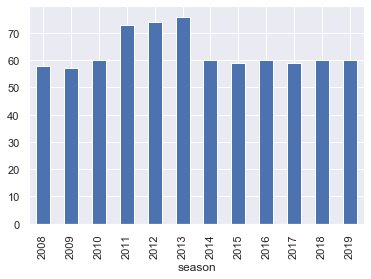

In [127]:
year_wise_analysing=Matches.groupby('season')
year_wise_analysing.count()
year_wise_analysing['id'].count().plot(kind='bar')

In [128]:
year_wise_analysing['id'].count()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: id, dtype: int64

In [129]:
Matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## from the below plot we can find huge missing values are there in umpire 3 columns .we can remove the column it will not create a impact on predicting the matches.#  

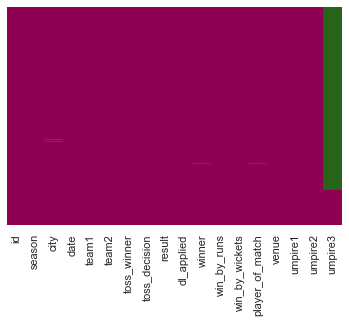

In [130]:
sns.heatmap(Matches.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

#  Removed the columns containing more missing values and have less impact on the predicting matches


In [131]:
Matchess=Matches.drop(['umpire3','city'],axis=1)

In [132]:
Matchess.head(2)

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


#  No missing values are there(well some small amount are still there but will not have impact on Today's match)

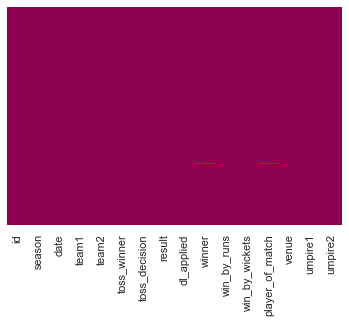

In [133]:
sns.heatmap(Matchess.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

#  Today's match is between Delhi capitals(DC) and Kings XI Punjab(KXIP).so we only want information between the matches that had take place between them.

#  Delhi Dardevils Changed  to Delhi capitals in 2019 So need to change the title to Delhi Capitals

In [134]:
Matches.replace('Delhi Daredevils','Delhi Capitals',inplace=True)

In [135]:
Matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [136]:
KXIP_DC1=Matches.loc[(Matches['team1']=='Delhi Capitals')&(Matches['team2'] =='Kings XI Punjab')]
KXIP_DC1

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
14,15,2017,Delhi,2017-04-15,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,Delhi Capitals,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
34,35,2017,Chandigarh,2017-04-30,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan,NaN
72,73,2008,Chandigarh,2008-04-27,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,Kings XI Punjab,0,4,SM Katich,"Punjab Cricket Association Stadium, Mohali",RE Koertzen,I Shivram,NaN
99,100,2008,Delhi,2008-05-17,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,1,Kings XI Punjab,6,0,DPMD Jayawardene,Feroz Shah Kotla,AV Jayaprakash,RE Koertzen,NaN
160,161,2009,Bloemfontein,2009-05-15,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,B Lee,OUTsurance Oval,HDPK Dharmasena,IL Howell,NaN
217,218,2010,Delhi,2010-04-11,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,Kings XI Punjab,0,7,PP Chawla,Feroz Shah Kotla,BF Bowden,AM Saheba,NaN
258,259,2011,Delhi,2011-04-23,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Delhi Capitals,29,0,DA Warner,Feroz Shah Kotla,S Asnani,RE Koertzen,NaN
442,443,2013,Delhi,2013-04-23,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Harmeet Singh,Feroz Shah Kotla,VA Kulkarni,K Srinath,NaN
501,502,2014,Delhi,2014-05-19,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,4,AR Patel,Feroz Shah Kotla,HDPK Dharmasena,PG Pathak,NaN
511,512,2014,Chandigarh,2014-05-25,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,M Vohra,"Punjab Cricket Association Stadium, Mohali",HDPK Dharmasena,VA Kulkarni,NaN


In [137]:
KXIP_DC2=Matches.loc[(Matches['team2']=='Delhi Capitals')&(Matches['team1'] =='Kings XI Punjab')]

In [138]:
KXIP_DC2

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
119,120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,normal,1,Delhi Capitals,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,NaN
176,177,2010,Chandigarh,2010-03-13,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,5,G Gambhir,"Punjab Cricket Association Stadium, Mohali",BR Doctrove,S Ravi,NaN
292,293,2011,Dharamsala,2011-05-15,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,normal,0,Kings XI Punjab,29,0,PP Chawla,Himachal Pradesh Cricket Association Stadium,Asad Rauf,SL Shastri,NaN
368,369,2012,Delhi,2012-05-15,Kings XI Punjab,Delhi Capitals,Kings XI Punjab,bat,normal,0,Delhi Capitals,0,5,UT Yadav,Feroz Shah Kotla,HDPK Dharmasena,BNJ Oxenford,NaN
373,374,2012,Dharamsala,2012-05-19,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,6,UT Yadav,Himachal Pradesh Cricket Association Stadium,BF Bowden,VA Kulkarni,NaN
411,412,2013,Dharamsala,2013-05-16,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,normal,0,Kings XI Punjab,7,0,DA Miller,Himachal Pradesh Cricket Association Stadium,HDPK Dharmasena,S Ravi,NaN
527,528,2015,Pune,2015-04-15,Kings XI Punjab,Delhi Capitals,Kings XI Punjab,bat,normal,0,Delhi Capitals,0,5,MA Agarwal,Maharashtra Cricket Association Stadium,CB Gaffaney,K Srinath,NaN
547,548,2015,Delhi,2015-05-01,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,9,NM Coulter-Nile,Feroz Shah Kotla,RK Illingworth,S Ravi,NaN
582,583,2016,Delhi,2016-04-15,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,8,A Mishra,Feroz Shah Kotla,S Ravi,C Shamshuddin,NaN
611,612,2016,Chandigarh,2016-05-07,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,normal,0,Kings XI Punjab,9,0,MP Stoinis,"Punjab Cricket Association IS Bindra Stadium, ...",HDPK Dharmasena,CK Nandan,NaN


In [139]:
KXIP_DC=KXIP_DC1.append(KXIP_DC2)

In [140]:
KXIP_DC

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
14,15,2017,Delhi,2017-04-15,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,Delhi Capitals,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
34,35,2017,Chandigarh,2017-04-30,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan,NaN
72,73,2008,Chandigarh,2008-04-27,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,Kings XI Punjab,0,4,SM Katich,"Punjab Cricket Association Stadium, Mohali",RE Koertzen,I Shivram,NaN
99,100,2008,Delhi,2008-05-17,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,1,Kings XI Punjab,6,0,DPMD Jayawardene,Feroz Shah Kotla,AV Jayaprakash,RE Koertzen,NaN
160,161,2009,Bloemfontein,2009-05-15,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,B Lee,OUTsurance Oval,HDPK Dharmasena,IL Howell,NaN
217,218,2010,Delhi,2010-04-11,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,Kings XI Punjab,0,7,PP Chawla,Feroz Shah Kotla,BF Bowden,AM Saheba,NaN
258,259,2011,Delhi,2011-04-23,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Delhi Capitals,29,0,DA Warner,Feroz Shah Kotla,S Asnani,RE Koertzen,NaN
442,443,2013,Delhi,2013-04-23,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Harmeet Singh,Feroz Shah Kotla,VA Kulkarni,K Srinath,NaN
501,502,2014,Delhi,2014-05-19,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,4,AR Patel,Feroz Shah Kotla,HDPK Dharmasena,PG Pathak,NaN
511,512,2014,Chandigarh,2014-05-25,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,M Vohra,"Punjab Cricket Association Stadium, Mohali",HDPK Dharmasena,VA Kulkarni,NaN


In [141]:
KXIP_DC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 14 to 732
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               24 non-null     int64 
 1   season           24 non-null     int64 
 2   city             24 non-null     object
 3   date             24 non-null     object
 4   team1            24 non-null     object
 5   team2            24 non-null     object
 6   toss_winner      24 non-null     object
 7   toss_decision    24 non-null     object
 8   result           24 non-null     object
 9   dl_applied       24 non-null     int64 
 10  winner           24 non-null     object
 11  win_by_runs      24 non-null     int64 
 12  win_by_wickets   24 non-null     int64 
 13  player_of_match  24 non-null     object
 14  venue            24 non-null     object
 15  umpire1          24 non-null     object
 16  umpire2          24 non-null     object
 17  umpire3          4 non-null      ob

# # Complete details of matches that takes placed between KXIP and DC

In [142]:
KXIP_DC.describe

<bound method NDFrame.describe of         id  season          city        date            team1  \
14      15    2017         Delhi  2017-04-15   Delhi Capitals   
34      35    2017    Chandigarh  2017-04-30   Delhi Capitals   
72      73    2008    Chandigarh  2008-04-27   Delhi Capitals   
99     100    2008         Delhi  2008-05-17   Delhi Capitals   
160    161    2009  Bloemfontein  2009-05-15   Delhi Capitals   
217    218    2010         Delhi  2010-04-11   Delhi Capitals   
258    259    2011         Delhi  2011-04-23   Delhi Capitals   
442    443    2013         Delhi  2013-04-23   Delhi Capitals   
501    502    2014         Delhi  2014-05-19   Delhi Capitals   
511    512    2014    Chandigarh  2014-05-25   Delhi Capitals   
637   7895    2018        Mohali    08/04/18   Delhi Capitals   
119    120    2009     Cape Town  2009-04-19  Kings XI Punjab   
176    177    2010    Chandigarh  2010-03-13  Kings XI Punjab   
292    293    2011    Dharamsala  2011-05-15  Kings XI P

In [143]:
print("No of matches that takes place between KXIP and DC:",len(KXIP_DC))

No of matches that takes place between KXIP and DC: 24


#  Below plot gives the details of the match that takes place between DC and KXIP

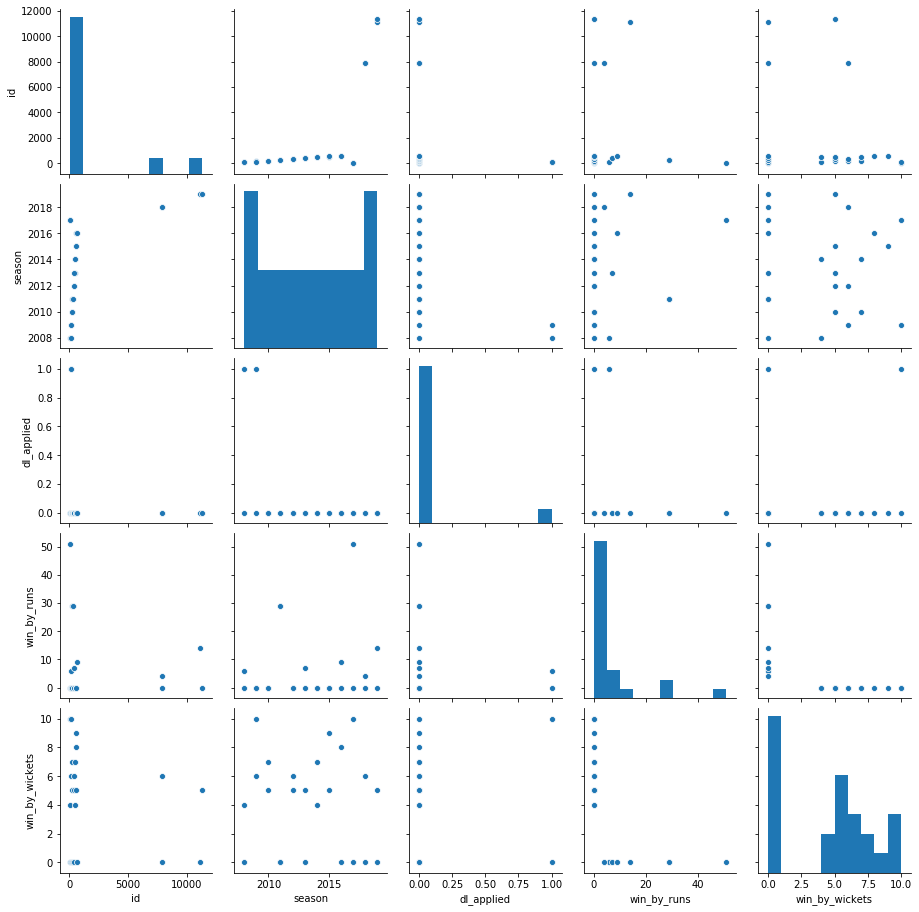

In [34]:
sns.pairplot(KXIP_DC)

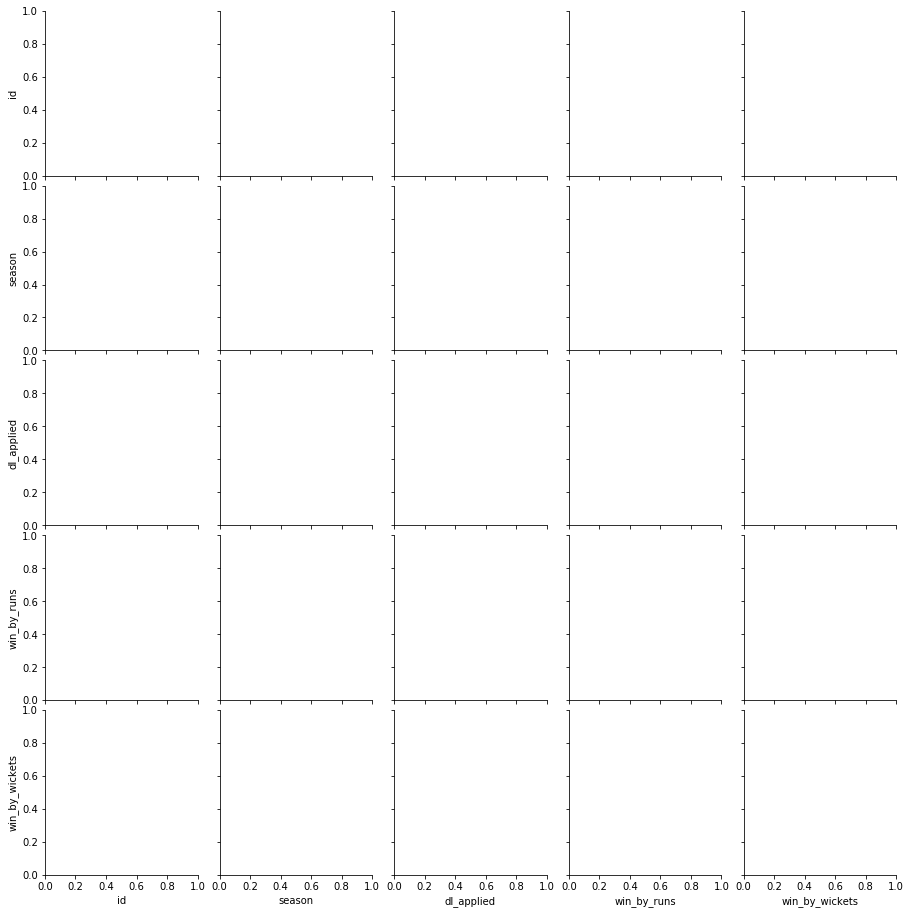

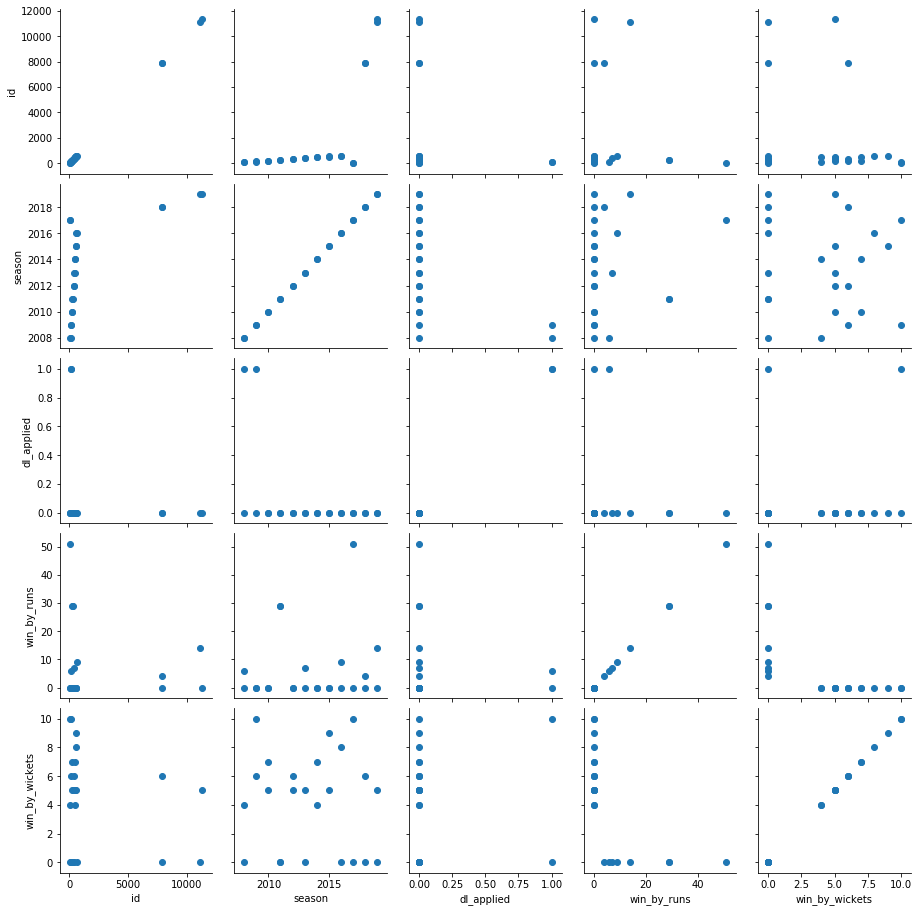

In [37]:
sns.PairGrid(KXIP_DC)
g=sns.PairGrid(KXIP_DC)
g.map(plt.scatter)

#  It looks like  DC won the Toss 15 Times and 9 Times SRH won the Toss

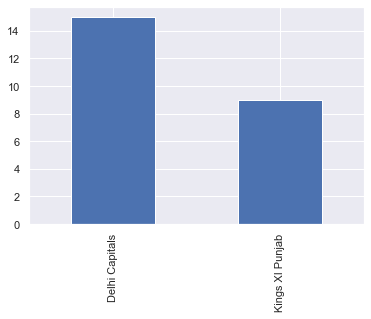

In [144]:
KXIP_DC['toss_winner'].value_counts().plot(kind='bar')

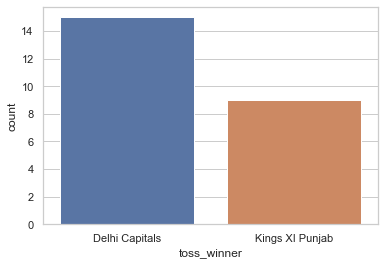

In [145]:
sns.set_style('whitegrid')
sns.countplot(x='toss_winner',data=KXIP_DC)

# DC went on to win the match 3 times by  batting first and 7 times by Fielding first against KXIP .so total it is (DC=win-10,loss-14)whereas for KXIP they wIn the match 3 times by batting first and win 11 times by batting first against DC.so it is (KXIP=win-14,loss=10)

In [146]:
KXIP_DC.tail(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
708,11149,2019,Mohali,01/04/19,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,normal,0,Kings XI Punjab,14,0,S Curran,IS Bindra Stadium,Anil Chaudhary,Chris Gaffaney,Vineet Kulkarni
732,11328,2019,Delhi,20/04/19,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,5,SS Iyer,Feroz Shah Kotla Ground,Ulhas Gandhe,C Shamshuddin,Bruce Oxenford


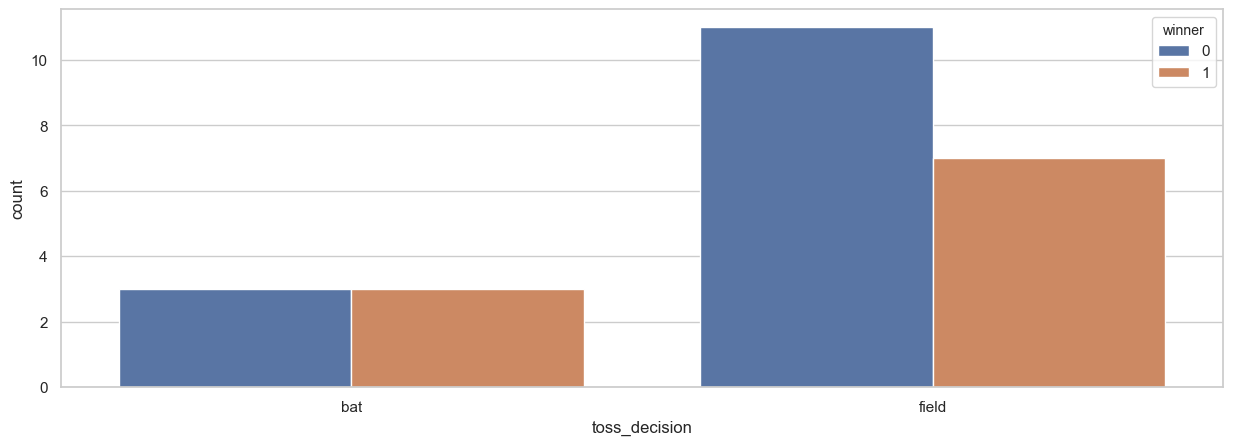

In [54]:
import sys
sys.setrecursionlimit(2000)
sns.set()
sns.set_style('whitegrid')
sns.countplot(x='toss_decision',hue="winner",data=KXIP_DC)

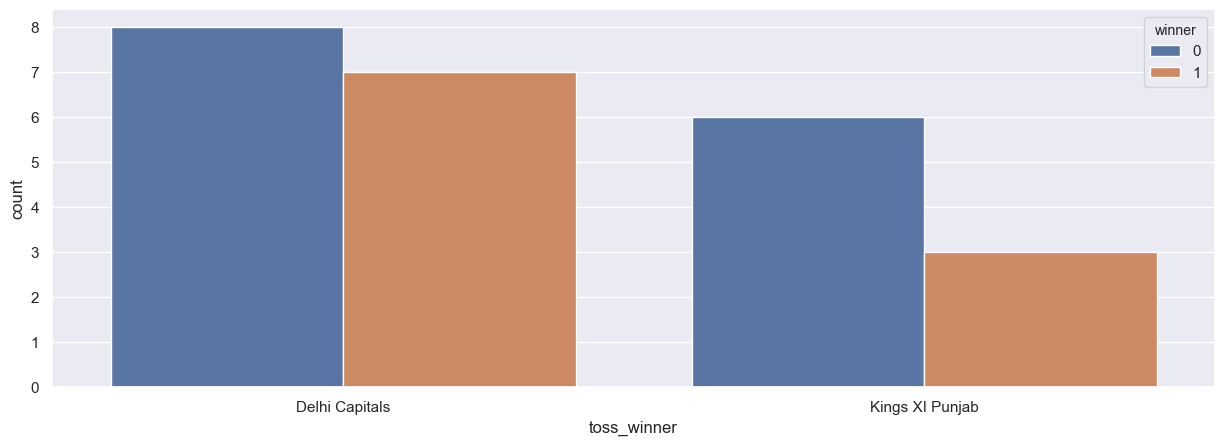

In [55]:
sns.set({'figure.figsize':(15,5)})
sns.countplot(x='toss_winner',hue="winner",data=KXIP_DC)

In [147]:
print("No of times toss won by both teams:")
KXIP_DC['toss_winner'].value_counts()

No of times toss won by both teams:


Delhi Capitals     15
Kings XI Punjab     9
Name: toss_winner, dtype: int64

In [181]:
print("Punjab win 14 times and Delhi win 10 times from 24 matches")

Punjab win 14 times and Delhi win 10 times from 24 matches


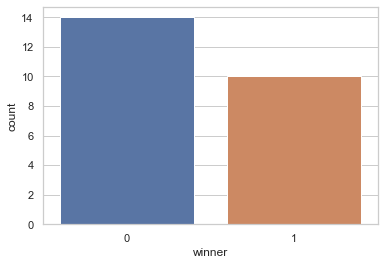

In [182]:
sns.set_style('whitegrid')
sns.countplot(x='winner',data=KXIP_DC)

# correlation between Columns in Matches Dataset

In [148]:
KXIP_DC.corr()

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.663609,-0.149828,-0.060255,-0.196976
season,0.663609,1.000000,-0.436713,0.110770,-0.067811
dl_applied,-0.149828,-0.436713,1.000000,-0.077533,0.066865
win_by_runs,-0.060255,0.110770,-0.077533,1.000000,-0.625321
win_by_wickets,-0.196976,-0.067811,0.066865,-0.625321,1.000000


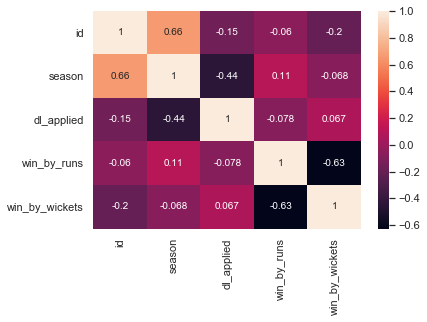

In [149]:
sns.heatmap(KXIP_DC.corr(),yticklabels=True,annot=True)

In [150]:
KXIP_DC['winner']=pd.get_dummies(KXIP_DC['winner'])

In [151]:
KXIP_DC.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
14,15,2017,Delhi,2017-04-15,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,1,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
34,35,2017,Chandigarh,2017-04-30,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,0,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan,NaN


# Using Sweetviz we can get details about the Matches

In [49]:
import sweetviz 
my_report=sweetviz.analyze([KXIP_DC,'KXIP_DC'],target_feat='winner')

:FEATURES DONE:                    |█████████████████████| [100%]   00:05  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [50]:
my_report.show_html("Report1.html")

#  Now let get into the Deliveries Dataset

In [152]:
Deliveries=pd.read_csv("deliveries.csv")

In [153]:
Deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [154]:
Deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [155]:
Deliveries.describe

<bound method NDFrame.describe of         match_id  inning         batting_team                 bowling_team  \
0              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
1              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
2              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
3              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
4              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
...          ...     ...                  ...                          ...   
179073     11415       2  Chennai Super Kings               Mumbai Indians   
179074     11415       2  Chennai Super Kings               Mumbai Indians   
179075     11415       2  Chennai Super Kings               Mumbai Indians   
179076     11415       2  Chennai Super Kings               Mumbai Indians   
179077     11415       2  Chennai Super Kings               Mumbai Indians   

        over  ball    batsman

# Need To replace Delhi Dardevils with Delhi Capitals

In [160]:
Deliveries.replace('Delhi Daredevils','Delhi Capitals',inplace=True)

In [161]:
Deliveries.tail(30)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179048,11415,2,Chennai Super Kings,Mumbai Indians,16,1,DJ Bravo,SR Watson,SL Malinga,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
179049,11415,2,Chennai Super Kings,Mumbai Indians,16,2,DJ Bravo,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179050,11415,2,Chennai Super Kings,Mumbai Indians,16,3,SR Watson,DJ Bravo,SL Malinga,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
179051,11415,2,Chennai Super Kings,Mumbai Indians,16,4,SR Watson,DJ Bravo,SL Malinga,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
179052,11415,2,Chennai Super Kings,Mumbai Indians,16,5,SR Watson,DJ Bravo,SL Malinga,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
179053,11415,2,Chennai Super Kings,Mumbai Indians,16,6,SR Watson,DJ Bravo,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179054,11415,2,Chennai Super Kings,Mumbai Indians,17,1,SR Watson,DJ Bravo,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179055,11415,2,Chennai Super Kings,Mumbai Indians,17,2,DJ Bravo,SR Watson,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179056,11415,2,Chennai Super Kings,Mumbai Indians,17,3,SR Watson,DJ Bravo,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
179057,11415,2,Chennai Super Kings,Mumbai Indians,17,4,SR Watson,DJ Bravo,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


# Filtering the match details that only takes place between Delhi Capitals and  Kings XI Punjab

In [162]:
Delhi_Punjab1=Deliveries.loc[(Deliveries['batting_team' ] =='Kings XI Punjab' ) & (Deliveries['bowling_team'] == 'Delhi Capitals')]

In [163]:
Delhi_Punjab1         

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
3445,15,2,Kings XI Punjab,Delhi Capitals,1,1,M Vohra,HM Amla,Z Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3446,15,2,Kings XI Punjab,Delhi Capitals,1,2,M Vohra,HM Amla,Z Khan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
3447,15,2,Kings XI Punjab,Delhi Capitals,1,3,HM Amla,M Vohra,Z Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3448,15,2,Kings XI Punjab,Delhi Capitals,1,4,HM Amla,M Vohra,Z Khan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
3449,15,2,Kings XI Punjab,Delhi Capitals,1,5,M Vohra,HM Amla,Z Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173615,11328,1,Kings XI Punjab,Delhi Capitals,20,2,H Brar,H Viljoen,K Rabada,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173616,11328,1,Kings XI Punjab,Delhi Capitals,20,3,H Viljoen,H Brar,K Rabada,0,...,2,0,0,0,2,2,4,NaN,NaN,NaN
173617,11328,1,Kings XI Punjab,Delhi Capitals,20,4,H Viljoen,H Brar,K Rabada,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
173618,11328,1,Kings XI Punjab,Delhi Capitals,20,5,H Viljoen,H Brar,K Rabada,0,...,1,0,0,0,1,1,2,NaN,NaN,NaN


In [164]:
Delhi_Punjab2=Deliveries.loc[(Deliveries['bowling_team' ] =='Kings XI Punjab' ) & (Deliveries['batting_team'] == 'Delhi Capitals')]

In [165]:
Delhi_Punjab2

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
3318,15,1,Delhi Capitals,Kings XI Punjab,1,1,SV Samson,SW Billings,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3319,15,1,Delhi Capitals,Kings XI Punjab,1,2,SV Samson,SW Billings,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3320,15,1,Delhi Capitals,Kings XI Punjab,1,3,SV Samson,SW Billings,Sandeep Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3321,15,1,Delhi Capitals,Kings XI Punjab,1,4,SV Samson,SW Billings,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3322,15,1,Delhi Capitals,Kings XI Punjab,1,5,SV Samson,SW Billings,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173741,11328,2,Delhi Capitals,Kings XI Punjab,19,6,SS Iyer,S Rutherford,Mohammed Shami,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173742,11328,2,Delhi Capitals,Kings XI Punjab,20,1,SS Iyer,S Rutherford,S Curran,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173743,11328,2,Delhi Capitals,Kings XI Punjab,20,2,S Rutherford,SS Iyer,S Curran,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173744,11328,2,Delhi Capitals,Kings XI Punjab,20,3,SS Iyer,S Rutherford,S Curran,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [166]:
Delhi_Punjab=Delhi_Punjab1.append(Delhi_Punjab2)

# Complete Details Of Delhi vs Punjab

In [167]:
Delhi_Punjab

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
3445,15,2,Kings XI Punjab,Delhi Capitals,1,1,M Vohra,HM Amla,Z Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3446,15,2,Kings XI Punjab,Delhi Capitals,1,2,M Vohra,HM Amla,Z Khan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
3447,15,2,Kings XI Punjab,Delhi Capitals,1,3,HM Amla,M Vohra,Z Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3448,15,2,Kings XI Punjab,Delhi Capitals,1,4,HM Amla,M Vohra,Z Khan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
3449,15,2,Kings XI Punjab,Delhi Capitals,1,5,M Vohra,HM Amla,Z Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173741,11328,2,Delhi Capitals,Kings XI Punjab,19,6,SS Iyer,S Rutherford,Mohammed Shami,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173742,11328,2,Delhi Capitals,Kings XI Punjab,20,1,SS Iyer,S Rutherford,S Curran,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173743,11328,2,Delhi Capitals,Kings XI Punjab,20,2,S Rutherford,SS Iyer,S Curran,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173744,11328,2,Delhi Capitals,Kings XI Punjab,20,3,SS Iyer,S Rutherford,S Curran,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


# using Match_id we can summarize that 24 matches were played between KXIP and DC

In [168]:
Delhi_Punjab['match_id'].value_counts()

502      253
528      253
293      251
7915     251
161      249
259      249
15       248
11328    248
73       248
177      246
612      245
11149    245
412      244
218      239
7895     238
369      236
374      236
443      226
548      212
583      207
512      200
35       157
100      123
120      108
Name: match_id, dtype: int64

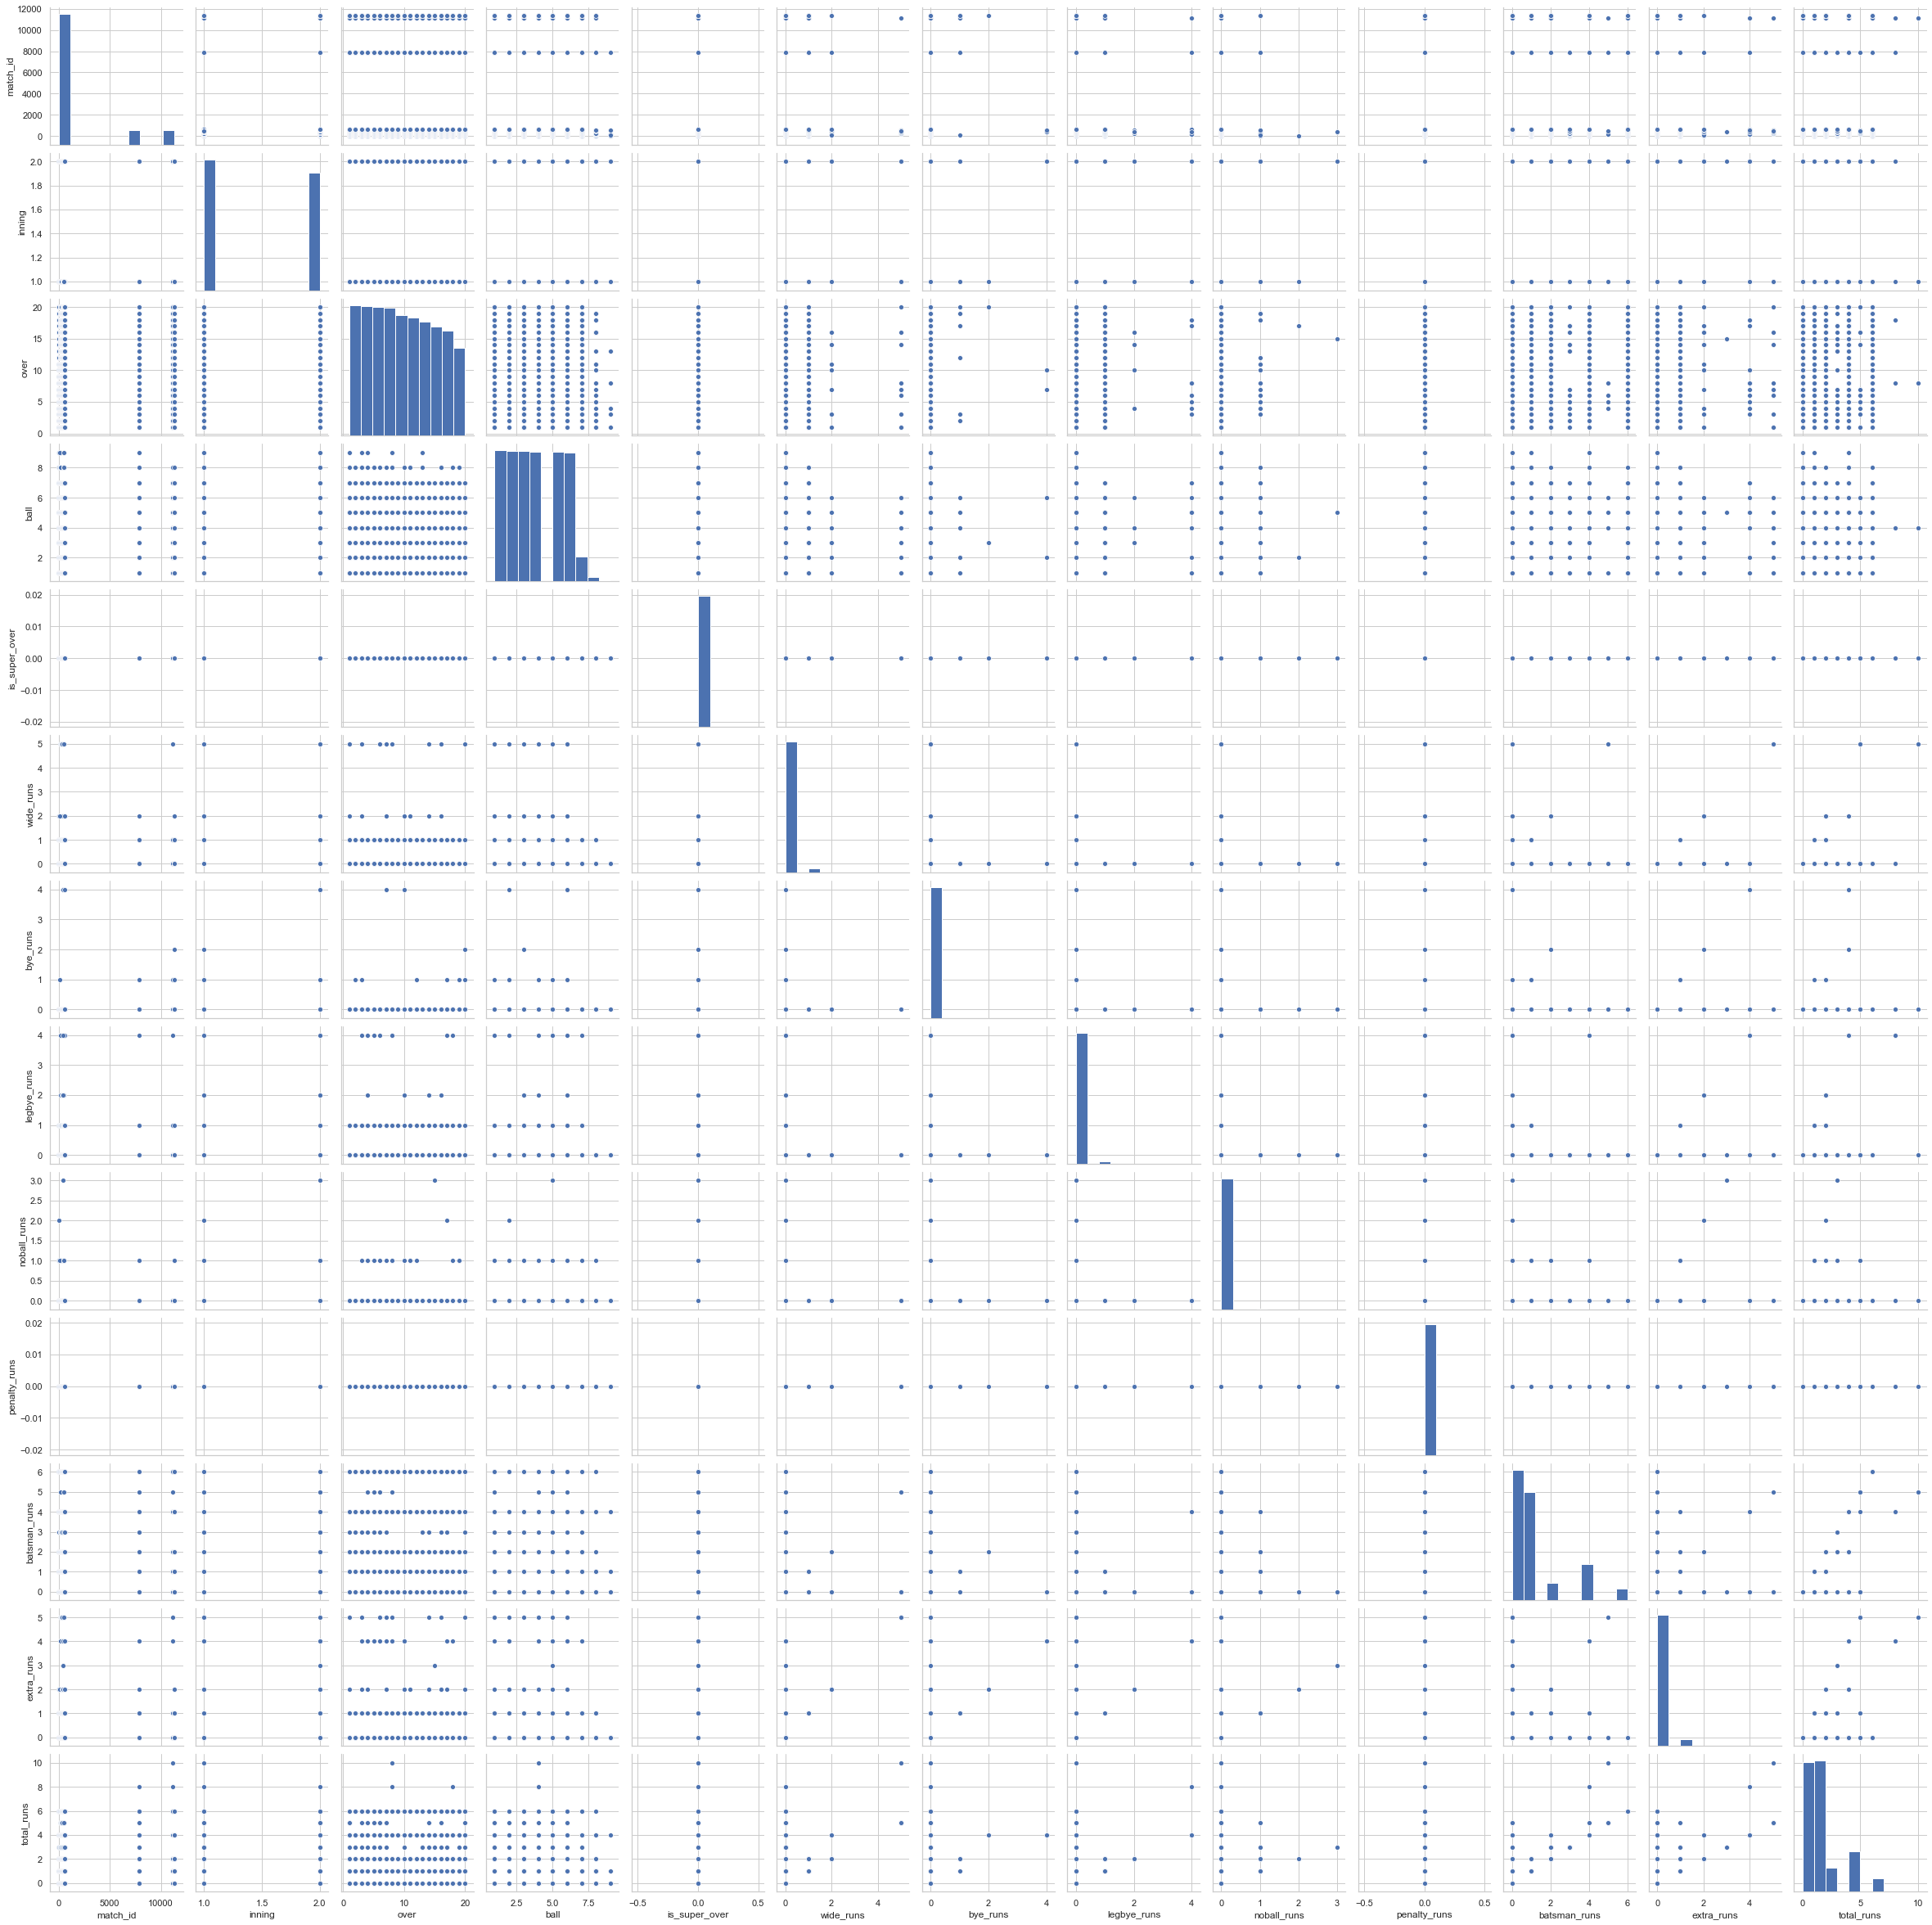

In [170]:
sns.pairplot(Delhi_Punjab)

# It is difficult to interpret covariance.Let's try correlation

In [183]:
Delhi_Punjab.cov()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.324741e+07,43.321584,915.428855,-8.318401,0.0,-6.646906,7.025494,-11.869257,-0.353882,0.0,174.507549,-11.844551,162.662998
inning,4.332158e+01,0.249298,-0.146645,-0.004540,0.0,-0.002524,0.000840,0.000395,0.001035,0.0,0.018411,-0.000253,0.018157
over,9.154289e+02,-0.146645,31.890180,-0.191396,0.0,-0.044525,0.004281,-0.022292,0.005429,0.0,0.440616,-0.057107,0.383509
ball,-8.318401e+00,-0.004540,-0.191396,3.294596,0.0,0.000389,0.001757,0.003869,0.001711,0.0,0.054374,0.007727,0.062101
is_super_over,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
wide_runs,-6.646906e+00,-0.002524,-0.044525,0.000389,0.0,0.084283,-0.000158,-0.001054,-0.000174,0.0,-0.039604,0.082896,0.043293
bye_runs,7.025494e+00,0.000840,0.004281,0.001757,0.0,-0.000158,0.010705,-0.000091,-0.000015,0.0,-0.002723,0.010441,0.007718
legbye_runs,-1.186926e+01,0.000395,-0.022292,0.003869,0.0,-0.001054,-0.000091,0.043565,-0.000100,0.0,-0.021405,0.042321,0.020916
noball_runs,-3.538824e-01,0.001035,0.005429,0.001711,0.0,-0.000174,-0.000015,-0.000100,0.005528,0.0,-0.001868,0.005239,0.003371
penalty_runs,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [184]:
Delhi_Punjab.corr()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,0.023839,0.044538,-0.001259,NaN,-0.006290,0.018656,-0.015624,-0.001308,NaN,0.030344,-0.008670,0.028229
inning,0.023839,1.000000,-0.052009,-0.005010,NaN,-0.017410,0.016266,0.003790,0.027887,NaN,0.023336,-0.001351,0.022971
over,0.044538,-0.052009,1.000000,-0.018673,NaN,-0.027158,0.007326,-0.018913,0.012931,NaN,0.049380,-0.026941,0.042897
ball,-0.001259,-0.005010,-0.018673,1.000000,NaN,0.000739,0.009358,0.010213,0.012681,NaN,0.018959,0.011342,0.021611
is_super_over,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wide_runs,-0.006290,-0.017410,-0.027158,0.000739,NaN,1.000000,-0.005275,-0.017389,-0.008075,NaN,-0.086335,0.760704,0.094194
bye_runs,0.018656,0.016266,0.007326,0.009358,NaN,-0.005275,1.000000,-0.004206,-0.001953,NaN,-0.016654,0.268838,0.047119
legbye_runs,-0.015624,0.003790,-0.018913,0.010213,NaN,-0.017389,-0.004206,1.000000,-0.006439,NaN,-0.064902,0.540174,0.063298
noball_runs,-0.001308,0.027887,0.012931,0.012681,NaN,-0.008075,-0.001953,-0.006439,1.000000,NaN,-0.015898,0.187708,0.028638
penalty_runs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Correlation between Features.From the correlation plot we can clearly see that extra runs,wide runs ,bye runs are correlated and apart from that batsman runs column and total_runs columns are highly correlated

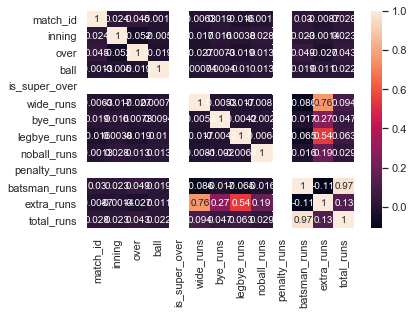

In [177]:
sns.heatmap(Delhi_Punjab.corr(),yticklabels=True,annot=True)

In [178]:
Delhi_Punjab.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,5412.000000,5412.000000,5412.000000,5412.000000,5412.0,5412.000000,5412.000000,5412.000000,5412.000000,5412.0,5412.000000,5412.000000,5412.000000
mean,2006.402624,1.472653,9.891907,3.624538,0.0,0.042868,0.003695,0.024575,0.004065,0.0,1.186622,0.075203,1.261826
std,3639.699602,0.499298,5.647139,1.815102,0.0,0.290315,0.103466,0.208723,0.074349,0.0,1.580087,0.375362,1.583153
min,15.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,177.000000,1.000000,5.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,412.000000,1.000000,10.000000,4.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
75%,583.000000,2.000000,15.000000,5.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
max,11328.000000,2.000000,20.000000,9.000000,0.0,5.000000,4.000000,4.000000,3.000000,0.0,6.000000,5.000000,10.000000


In [179]:
Delhi_Punjab

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
3445,15,2,Kings XI Punjab,Delhi Capitals,1,1,M Vohra,HM Amla,Z Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3446,15,2,Kings XI Punjab,Delhi Capitals,1,2,M Vohra,HM Amla,Z Khan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
3447,15,2,Kings XI Punjab,Delhi Capitals,1,3,HM Amla,M Vohra,Z Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3448,15,2,Kings XI Punjab,Delhi Capitals,1,4,HM Amla,M Vohra,Z Khan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
3449,15,2,Kings XI Punjab,Delhi Capitals,1,5,M Vohra,HM Amla,Z Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173741,11328,2,Delhi Capitals,Kings XI Punjab,19,6,SS Iyer,S Rutherford,Mohammed Shami,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173742,11328,2,Delhi Capitals,Kings XI Punjab,20,1,SS Iyer,S Rutherford,S Curran,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173743,11328,2,Delhi Capitals,Kings XI Punjab,20,2,S Rutherford,SS Iyer,S Curran,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173744,11328,2,Delhi Capitals,Kings XI Punjab,20,3,SS Iyer,S Rutherford,S Curran,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


#  How many Runs will delhi score in this powerplay?

In [103]:
Delhi_pp_Score=Delhi_Rajastan2.append(Delhi_Rajastan3)

In [109]:
Delhi_pp_Score

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
14457,62,2,Delhi Daredevils,Rajasthan Royals,1,1,G Gambhir,V Sehwag,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14458,62,2,Delhi Daredevils,Rajasthan Royals,1,2,G Gambhir,V Sehwag,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14459,62,2,Delhi Daredevils,Rajasthan Royals,1,3,G Gambhir,V Sehwag,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14460,62,2,Delhi Daredevils,Rajasthan Royals,1,4,G Gambhir,V Sehwag,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14461,62,2,Delhi Daredevils,Rajasthan Royals,1,5,G Gambhir,V Sehwag,MM Patel,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177388,11344,2,Delhi Capitals,Rajasthan Royals,16,3,RR Pant,AR Patel,S Gopal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177389,11344,2,Delhi Capitals,Rajasthan Royals,16,4,AR Patel,RR Pant,S Gopal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177390,11344,2,Delhi Capitals,Rajasthan Royals,16,5,RR Pant,AR Patel,S Gopal,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
177391,11344,2,Delhi Capitals,Rajasthan Royals,16,6,RR Pant,AR Patel,S Gopal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


# Filtering the overs between 1-6 to get the powerplay runs

In [123]:
Delhi_pp_Score1=Delhi_pp_Score.loc[(Delhi_pp_Score['over']<=6)]

In [146]:
Delhi_pp_Score1.head(30)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
14457,62,2,Delhi Daredevils,Rajasthan Royals,1,1,G Gambhir,V Sehwag,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14458,62,2,Delhi Daredevils,Rajasthan Royals,1,2,G Gambhir,V Sehwag,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14459,62,2,Delhi Daredevils,Rajasthan Royals,1,3,G Gambhir,V Sehwag,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14460,62,2,Delhi Daredevils,Rajasthan Royals,1,4,G Gambhir,V Sehwag,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14461,62,2,Delhi Daredevils,Rajasthan Royals,1,5,G Gambhir,V Sehwag,MM Patel,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
14462,62,2,Delhi Daredevils,Rajasthan Royals,1,6,G Gambhir,V Sehwag,MM Patel,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
14463,62,2,Delhi Daredevils,Rajasthan Royals,2,1,V Sehwag,G Gambhir,SR Watson,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
14464,62,2,Delhi Daredevils,Rajasthan Royals,2,2,V Sehwag,G Gambhir,SR Watson,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
14465,62,2,Delhi Daredevils,Rajasthan Royals,2,3,V Sehwag,G Gambhir,SR Watson,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
14466,62,2,Delhi Daredevils,Rajasthan Royals,2,4,V Sehwag,G Gambhir,SR Watson,0,...,0,0,0,0,0,0,0,V Sehwag,bowled,NaN


In [131]:
Delhi_pp_Score1['over']

14457     1
14458     1
14459     1
14460     1
14461     1
         ..
177326    6
177327    6
177328    6
177329    6
177330    6
Name: over, Length: 748, dtype: int64

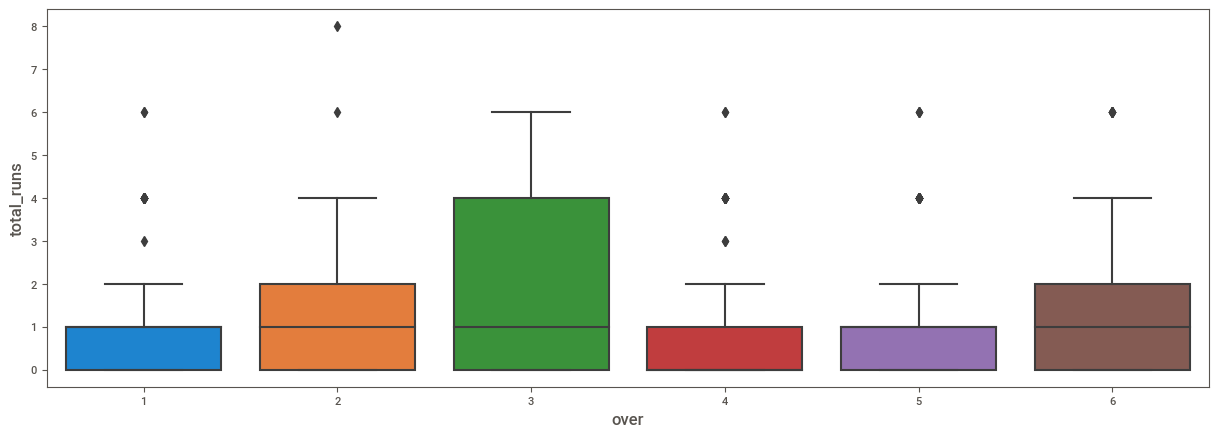

In [132]:
sns.boxplot(x='over',y='total_runs',data=Delhi_pp_Score1)

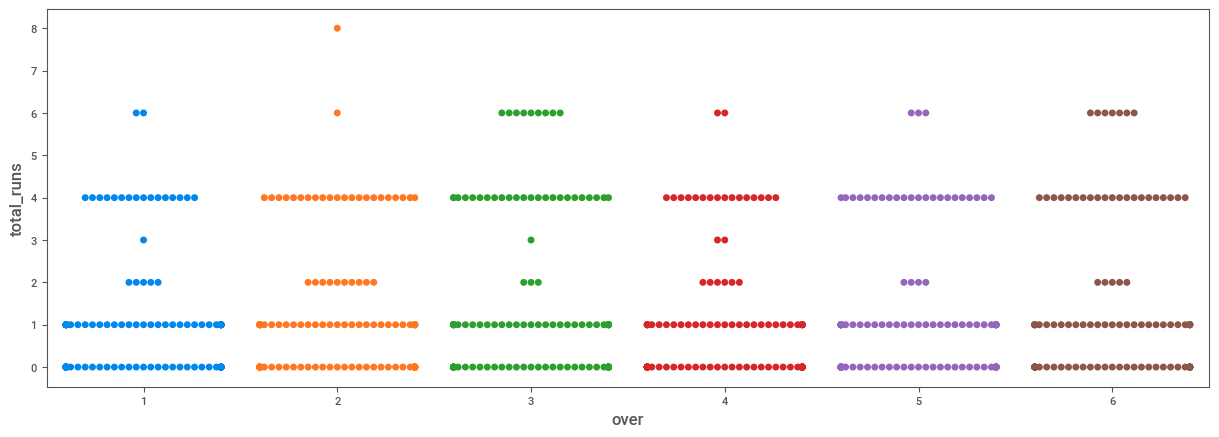

In [133]:
sns.swarmplot(x='over',y='total_runs',data=Delhi_pp_Score1)

In [134]:
Delhi_pp_Score1['total_runs'].value_counts()

0    326
1    239
4    121
2     33
6     24
3      4
8      1
Name: total_runs, dtype: int64

In [138]:
Total_score=Delhi_pp_Score1['total_runs'].sum()

In [139]:
Total_score

953

# from the Match_id we can conclude that 20 Matches were played between RR and DC

In [137]:
Delhi_pp_Score1['match_id'].value_counts()

553      40
115      39
180      39
433      39
241      38
203      38
165      38
62       38
345      37
7899     37
385      37
498      37
133      37
523      37
93       37
349      36
480      36
11344    36
11331    36
7925     36
Name: match_id, dtype: int64

# Average powerplay runs scored by Delhi Capitals against Rajastan Royals was 47.65

In [141]:
print("Average powerplay runs scored by Delhi Capitals was",Total_score/20)

Average powerplay runs scored by Delhi Capitals was 47.65


# How many Runs will Steve Smith Score?

In [147]:
Steve_Smith_runs=Delhi_Capitials_Rajastan_Royals.loc[(Delhi_Capitials_Rajastan_Royals['batsman']=='SPD Smith')]

In [148]:
Steve_Smith_runs

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
124099,523,2,Rajasthan Royals,Delhi Daredevils,6,3,SPD Smith,AM Rahane,NM Coulter-Nile,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
124100,523,2,Rajasthan Royals,Delhi Daredevils,6,4,SPD Smith,AM Rahane,NM Coulter-Nile,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
124101,523,2,Rajasthan Royals,Delhi Daredevils,6,5,SPD Smith,AM Rahane,NM Coulter-Nile,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
124102,523,2,Rajasthan Royals,Delhi Daredevils,6,6,SPD Smith,AM Rahane,NM Coulter-Nile,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
124105,523,2,Rajasthan Royals,Delhi Daredevils,7,3,SPD Smith,AM Rahane,AD Mathews,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
124107,523,2,Rajasthan Royals,Delhi Daredevils,7,5,SPD Smith,AM Rahane,AD Mathews,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
124108,523,2,Rajasthan Royals,Delhi Daredevils,7,6,SPD Smith,AM Rahane,AD Mathews,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
124109,523,2,Rajasthan Royals,Delhi Daredevils,8,1,SPD Smith,AM Rahane,A Mishra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
124110,523,2,Rajasthan Royals,Delhi Daredevils,8,2,SPD Smith,AM Rahane,A Mishra,0,...,0,0,0,0,0,0,0,SPD Smith,caught,MA Agarwal
174224,11331,1,Rajasthan Royals,Delhi Capitals,3,4,SPD Smith,AM Rahane,AR Patel,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


# It looks like Steve_smith only played two matches against DC based on the match_id

In [151]:
Avg_score=Steve_Smith_runs['batsman_runs'].sum()

In [152]:
Avg_score

61

In [150]:
Steve_Smith_runs['match_id'].value_counts()

11331    33
523       9
Name: match_id, dtype: int64

In [156]:
print("Average run scored by steve smith against DC was",Avg_score//2)

Average run scored by steve smith against DC was 30


# Let's see how his performance against DC bowlers

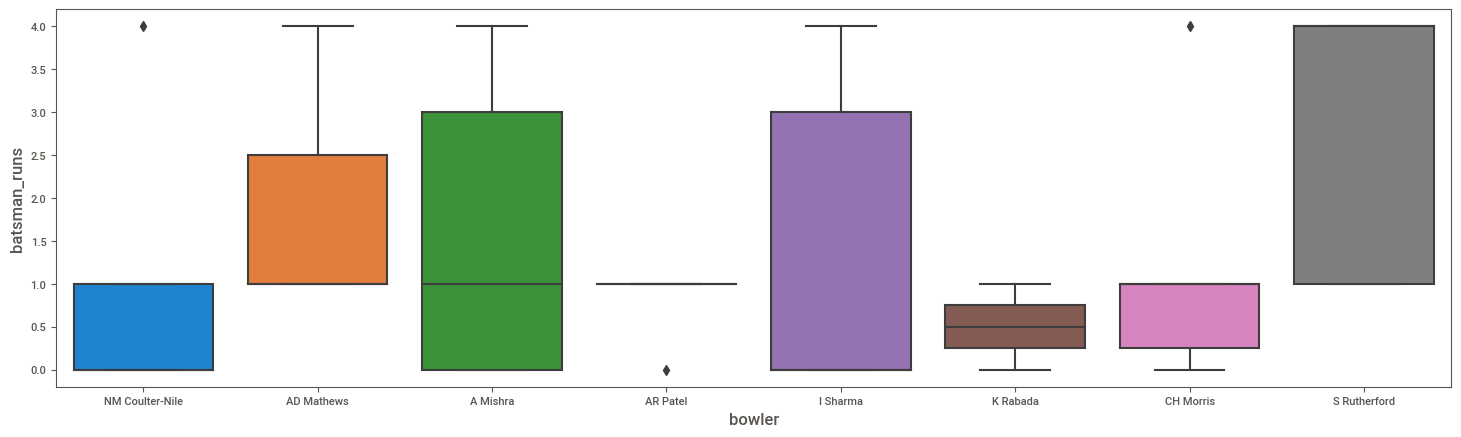

In [155]:
plt.figure(figsize=(18,5))
sns.boxplot(x='bowler',y='batsman_runs',data=Steve_Smith_runs)

# Steve_smith  ball by ball runs against DC bowlers over the years.He smashed few fours against Amit mishra(currently playing in DC).well against Rabada he only faced two balls and few scored few runs  against AR patel(Axar patel)

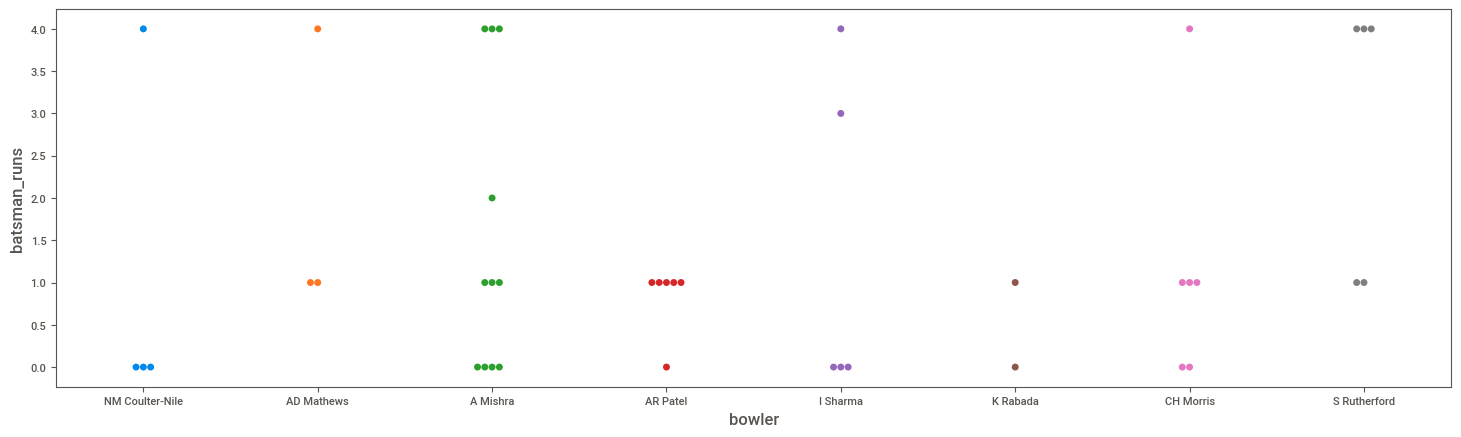

In [157]:
plt.figure(figsize=(18,5))
sns.swarmplot(x='bowler',y='batsman_runs',data=Steve_Smith_runs)

# Using sweetviz we can clearly steve_smith quite analysis against DC

In [160]:
import sweetviz as sv
Steve_Smith_runs=sv.analyze(Steve_Smith_runs)


                                   |                         | [  0%]   00:00  -> (? left)
Summarizing dataframe:             |                         | [  0%]   00:00  -> (? left)
:match_id:                         |█▉                   | [  9%]   00:00  -> (00:00 left)
:match_id:                         |██▊                  | [ 14%]   00:00  -> (00:02 left)
:inning:                           |██▊                  | [ 14%]   00:00  -> (00:02 left)
:inning:                           |███▊                 | [ 18%]   00:00  -> (00:03 left)
:batting_team:                     |███▊                 | [ 18%]   00:00  -> (00:03 left)
:batting_team:                     |████▊                | [ 23%]   00:01  -> (00:04 left)
:bowling_team:                     |████▊                | [ 23%]   00:01  -> (00:04 left)
:bowling_team:                     |█████▋               | [ 27%]   00:01  -> (00:04 left)
:over:                             |█████▋               | [ 27%]   00:01  -> (00:04 left

Creating Associations graph... DONE!


In [161]:
Steve_Smith_runs.show_html()

# How many wides will be bowled in the match?


In [167]:
DC_RR_Wides=Delhi_Capitials_Rajastan_Royals['wide_runs'].value_counts()

In [168]:
DC_RR_Wides

0    4471
1     135
2       7
5       3
3       1
Name: wide_runs, dtype: int64

In [171]:
Delhi_Capitials_Rajastan_Royals['wide_runs'].sum()

167

In [166]:
Delhi_Capitials_Rajastan_Royals['match_id'].value_counts()

553      255
523      252
498      251
165      251
385      248
345      247
93       245
11331    241
133      240
241      238
433      237
480      235
203      233
180      232
11344    224
115      223
62       219
349      216
7925     184
7899     146
Name: match_id, dtype: int64

In [175]:
print("Average wides bowled between DC and RR in a single match:",167//20)

Average wides bowled between DC and RR in a single match: 8


# How many wickets will taken during the entire match?

In [199]:
Delhi_Capitials_Rajastan_Royals

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
14335,62,1,Rajasthan Royals,Delhi Daredevils,1,1,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14336,62,1,Rajasthan Royals,Delhi Daredevils,1,2,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14337,62,1,Rajasthan Royals,Delhi Daredevils,1,3,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14338,62,1,Rajasthan Royals,Delhi Daredevils,1,4,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
14339,62,1,Rajasthan Royals,Delhi Daredevils,1,5,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177290,11344,1,Rajasthan Royals,Delhi Capitals,20,3,VR Aaron,R Parag,TA Boult,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177291,11344,1,Rajasthan Royals,Delhi Capitals,20,4,R Parag,VR Aaron,TA Boult,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
177292,11344,1,Rajasthan Royals,Delhi Capitals,20,5,R Parag,VR Aaron,TA Boult,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
177293,11344,1,Rajasthan Royals,Delhi Capitals,20,6,R Parag,VR Aaron,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [202]:
Delhi_Capitials_Rajastan_Royals.dropna(axis=0,inplace=True)

In [203]:
Delhi_Capitials_Rajastan_Royals

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
14350,62,1,Rajasthan Royals,Delhi Daredevils,3,3,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,T Kohli,caught,M Manhas
14358,62,1,Rajasthan Royals,Delhi Daredevils,4,5,YK Pathan,SR Watson,B Geeves,0,...,0,0,0,0,0,0,0,YK Pathan,run out,M Manhas
14373,62,1,Rajasthan Royals,Delhi Daredevils,7,2,SR Watson,M Kaif,R Bhatia,0,...,0,0,0,0,1,0,1,SR Watson,run out,S Dhawan
14398,62,1,Rajasthan Royals,Delhi Daredevils,11,3,M Kaif,RA Jadeja,R Bhatia,0,...,0,0,0,0,0,0,0,M Kaif,caught,B Geeves
21761,93,2,Rajasthan Royals,Delhi Daredevils,4,1,GC Smith,YK Pathan,MF Maharoof,0,...,0,0,0,0,0,0,0,YK Pathan,run out,AB de Villiers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177237,11344,1,Rajasthan Royals,Delhi Capitals,12,2,S Gopal,R Parag,A Mishra,0,...,0,0,0,0,0,0,0,S Gopal,stumped,RR Pant
177238,11344,1,Rajasthan Royals,Delhi Capitals,12,3,STR Binny,R Parag,A Mishra,0,...,0,0,0,0,0,0,0,STR Binny,caught,RR Pant
177249,11344,1,Rajasthan Royals,Delhi Capitals,14,2,K Gowtham,R Parag,A Mishra,0,...,0,0,0,0,0,0,0,K Gowtham,caught,I Sharma
177277,11344,1,Rajasthan Royals,Delhi Capitals,18,3,I Sodhi,R Parag,TA Boult,0,...,0,0,0,0,0,0,0,I Sodhi,caught,A Mishra


In [211]:
Delhi_Capitials_Rajastan_Royals['dismissal_kind'].value_counts()

caught     130
run out     23
stumped     12
Name: dismissal_kind, dtype: int64

In [213]:
print("Average wickets taken between DC and RR in a single match",165//20)

Average wickets taken between DC and RR in a single match 8


#  We can predict the match results from this analysis but current form of  players plays an huge role in predicting the winner in this match.